In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os

from skimage.io import imread, imsave
from keras.optimizers import Adam
from keras import applications
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

/home/csci8523/ganta016/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
source_dir = os.path.join('brazilian_coffee_dataset', 'Images')

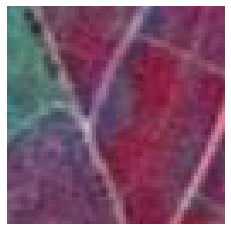

In [3]:
plt.imshow(imread('brazilian_coffee_dataset/Images/coffee/arceburgo.T1024.B1088.L4480.R4544.jpg'))
plt.axis('off')
plt.show()

In [4]:
labels = os.listdir(source_dir)

In [5]:
pretrained_model = applications.InceptionV3(include_top=False, weights='imagenet')
pretrained_model.trainable = False

In [6]:
image_data_generator = ImageDataGenerator(rescale=1/255.0)
image_generator = image_data_generator.flow_from_directory(source_dir,
                                                        batch_size=64,
                                                        shuffle=False
                                                        )
count = 0
X_batches, Y_batches = [], []
for X, Y in image_generator:
    X_batches.append(pretrained_model.predict_on_batch(X))
    Y_batches.append(Y)
    count += X.shape[0]
    if count >= image_generator.n:
        break

x_data = np.concatenate(X_batches)
y_data = np.concatenate(Y_batches)

Found 2876 images belonging to 2 classes.


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.4, random_state=101)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size = 0.5, random_state=101)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

In [9]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_fit_history = model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=2, validation_data=(x_val, y_val))

/home/csci8523/ganta016/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
27/27 - 3s - loss: 0.9118 - accuracy: 0.7200 - val_loss: 0.4106 - val_accuracy: 0.8194 - 3s/epoch - 103ms/step
Epoch 2/100
27/27 - 2s - loss: 0.3198 - accuracy: 0.8643 - val_loss: 0.3888 - val_accuracy: 0.8385 - 2s/epoch - 62ms/step
Epoch 3/100
27/27 - 2s - loss: 0.2362 - accuracy: 0.9055 - val_loss: 0.3970 - val_accuracy: 0.8333 - 2s/epoch - 56ms/step
Epoch 4/100
27/27 - 2s - loss: 0.1711 - accuracy: 0.9443 - val_loss: 0.4094 - val_accuracy: 0.8385 - 2s/epoch - 58ms/step
Epoch 5/100
27/27 - 2s - loss: 0.1170 - accuracy: 0.9612 - val_loss: 0.4633 - val_accuracy: 0.8368 - 2s/epoch - 75ms/step
Epoch 6/100
27/27 - 1s - loss: 0.0910 - accuracy: 0.9728 - val_loss: 0.4374 - val_accuracy: 0.8490 - 1s/epoch - 45ms/step
Epoch 7/100
27/27 - 1s - loss: 0.0644 - accuracy: 0.9872 - val_loss: 0.4372 - val_accuracy: 0.8403 - 1s/epoch - 53ms/step
Epoch 8/100
27/27 - 2s - loss: 0.0465 - accuracy: 0.9884 - val_loss: 0.4700 - val_accuracy: 0.8368 - 2s/epoch - 75ms/step
Epoch 9/100
27/27 - 1s 

In [10]:
model.save_weights("brazilian_final_3.h5")

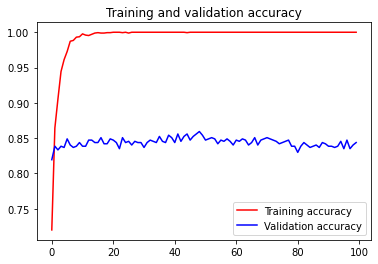

<Figure size 432x288 with 0 Axes>

In [11]:
accuracy = model_fit_history.history['accuracy']
val_accuracy = model_fit_history.history['val_accuracy']
loss = model_fit_history.history['loss']
val_loss = model_fit_history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

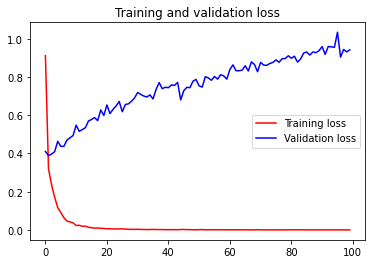

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

18/18 [==============================] - 0s 9ms/step


In [14]:
y_test = np.nonzero(y_test)[1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Model predication accuracy: {accuracy:.3f}')
print(f'\nClassification report:\n {classification_report(y_test, y_pred)}')

Model predication accuracy: 0.842

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       297
           1       0.84      0.83      0.84       278

    accuracy                           0.84       575
   macro avg       0.84      0.84      0.84       575
weighted avg       0.84      0.84      0.84       575

